<a href="https://colab.research.google.com/github/Meghashyamt/python/blob/master/lineartitanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import librarires 
import numpy as np
import pandas as pd

#import data visuvalize
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline



#import logical
from sklearn.linear_model import LinearRegression

#import train test
from sklearn.model_selection import train_test_split

#import metrics
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix, classification_report
from sklearn import metrics
from scipy import stats

In [0]:
data=pd.read_excel("titanic3.xls")

data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [0]:
data.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [0]:
data=data.fillna(data.mean())

In [0]:
data.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            0
cabin        1014
embarked        2
boat          823
body            0
home.dest     564
dtype: int64

In [0]:
data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,12.883199,1.041658,0.865560,51.738879,29.591544
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,160.809917
50%,3.000000,0.000000,29.881135,0.000000,0.000000,14.454200,160.809917
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,160.809917
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


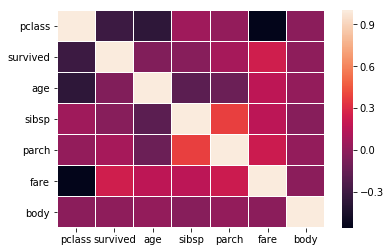

In [0]:
sb.heatmap(data.corr(), linewidth=0.2)

Range of skewness, S<|1.96|
skewness of hp: 0.45539814290326736
skewness of wt: 4.364366076590386
Kurtosis of hp: 0.9301508643582603
Kurtosis of wt: 26.94306999884472


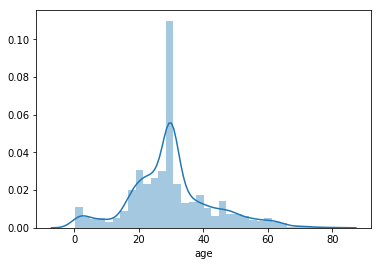

In [0]:
sb.distplot(data.age)
print("Range of skewness, S<|1.96|")

print("skewness of hp:",stats.skew(data.age))
print("skewness of wt:",stats.skew(data.fare))

print("Kurtosis of hp:",stats.kurtosis(data.age))
print("Kurtosis of wt:",stats.kurtosis(data.fare))

In [0]:
data.corr()

,pclass,survived,age,sibsp,parch,fare,body
pclass,1.000000,-3.124694e-01,-0.366370,0.060832,0.018322,-0.558477,-1.064472e-02
survived,-0.312469,1.000000e+00,-0.050199,-0.027825,0.082660,0.244208,1.912936e-16
age,-0.366370,-5.019898e-02,1.000000,-0.190747,-0.130872,0.171521,1.964239e-02
sibsp,0.060832,-2.782512e-02,-0.190747,1.000000,0.373587,0.160224,-2.591925e-02
parch,0.018322,8.265957e-02,-0.130872,0.373587,1.000000,0.221522,1.517702e-02
fare,-0.558477,2.442078e-01,0.171521,0.160224,0.221522,1.000000,-1.058336e-02
body,-0.010645,1.912936e-16,0.019642,-0.025919,0.015177,-0.010583,1.000000e+00


In [0]:
X= data.loc[:, ('pclass', 'age', 'parch', 'sibsp')]
y=data.survived

In [0]:
#for training and testing we split 
#by default test size it will take 70,30 percentage
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20, random_state=14)

In [0]:
print("X_train shape",X_train.shape)
print("X_test shape",X_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)

X_train shape (1047, 4)
X_test shape (262, 4)
y_train shape (1047,)
y_test shape (262,)


In [0]:
# For Linear Regression
model_lr=LinearRegression()

In [0]:
model_lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
y_predict= model_lr.predict(X_test)

In [0]:
y_test

1105    0
724     0
214     1
295     1
397     0
282     1
168     1
1220    0
486     0
499     0
958     0
1095    0
461     0
818     1
895     1
786     0
403     0
490     0
173     0
565     0
9       0
38      0
980     1
841     0
1116    0
505     0
686     1
51      0
568     0
976     0
       ..
1217    0
1234    0
785     1
620     0
1041    0
536     1
691     0
1016    0
193     1
1036    1
1107    0
44      1
839     0
556     0
550     1
1141    0
659     1
752     0
506     0
410     0
189     0
795     0
459     0
268     0
1063    0
473     0
608     0
1044    1
1143    0
673     0
Name: survived, Length: 262, dtype: int64

In [0]:
y_predict

array([ 0.26398999,  0.21328019,  0.68131451,  0.88766424,  0.26585958,
        0.46787895,  0.60547301,  0.20592034,  0.48665499,  0.44249591,
        0.47678377,  0.22151487,  0.31737851,  0.32367789,  0.46333662,
        0.3089582 ,  0.49401484,  0.24378004,  0.64595217,  0.47929514,
        0.36259806,  0.58339347,  0.27215896,  0.31631805,  0.22151487,
        0.31001866,  0.27951881,  0.64227224,  0.52713415,  0.22151487,
        0.63143053,  0.16176126,  0.1838408 ,  0.44249591,  0.15240246,
        0.1838408 ,  0.22151487,  0.45973265,  0.39916266,  0.26479912,
        0.22151487,  0.22151487,  0.76131369,  0.22151487,  0.30159835,
        0.40569667,  0.16176126,  0.45315925,  0.18695866,  0.28687866,
        0.0734431 ,  0.27951881,  0.44985576,  0.27215896,  0.70851087,
        0.07269968,  0.18695866,  0.22151487,  0.21552322,  0.22799988,
        0.07269968,  0.18695866,  0.41529955,  0.48995849,  0.71811374,
        0.60547301,  0.09552264,  0.76738964,  0.67171163,  0.50

In [0]:
#to find accuracy
r2_score(y_test,y_predict)

0.11275028716496927